Add your import statements and the database connection statements in the below code block

Database file path: /course/data/CSE-578/dinofunworld.db

In [18]:
# your code here
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
db_filename = "dinofunworld.db"
connect = sqlite3.connect(db_filename)
cursor = connect.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables_names = cursor.fetchall()
print(tables_names)
for name in tables_names:
    cursor.execute(f"SELECT * FROM {name[0]}")
    table_cols = [description[0] for description in cursor.description]
    print(table_cols)

[('checkin',), ('attraction',), ('sequences',)]
['index', 'visitorID', 'timestamp', 'attraction', 'duration', 'type']
['index', 'AttractionID', 'Name', 'Region', 'Category', 'type']
['index', 'visitorID', 'sequence']


### **Question 1**:
Create and display a control chart showing attendance at the ride 'Atmosfear' over the data provided. In the control chart, display the attendance, the mean attendance, and bands for one and two standard deviations away from the average.

**Note:** 
* For this question, display the control chart in the notebook and print the mean attendance and standard deviation values as a list. 
For example: [mean, standard_deviation]
* Create a single Control chart that displays the mean, standard deviation, and attendance, adhering to the specified line style and color as outlined below.
    * Mean: 'g-'
    * +2 STD and -2 STD: 'r-'
    * +STD and -STD: 'y-'
    * Attendance: 'b-'
* The Control Chart should also have the below mentioned parameters,
    * legend that displays the mean and standard deviation adhering to the specified line and color. Note: Legend should be outside the plot.
    * title named '**Control Chart of attendance at Atmosfear**'
    * x-label ('**Time in minutes**') and y-label ('**Attendance**')
* The plot must not have the following parameters,
    * do not set figure size
    * do not set font size or font-weight for titles and labels


[126.359375, 73.63511071604992]


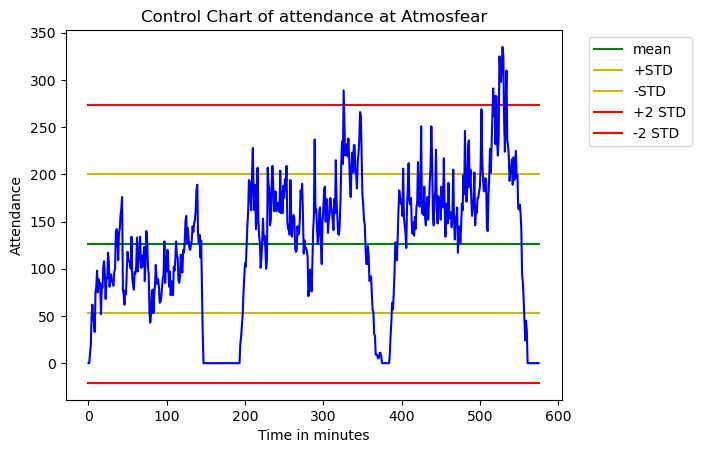

In [66]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
attraction_id = cursor.execute("SELECT AttractionID FROM attraction WHERE Name LIKE '%Atmosfear%'").fetchone()
sequences = cursor.execute("SELECT sequence FROM sequences").fetchall()
sequences = np.asarray([tup[0].split('-') for tup in sequences])
attendance = np.sum(sequences == str(attraction_id[0]), axis = 0)
mean = float(np.nanmean(attendance))
std = float(np.nanstd(attendance))
print([mean,std])

plt.plot([0,len(attendance)], [mean, mean], 'g-')
plt.plot([0,len(attendance)], [mean+std, mean+std], 'y-')
plt.plot([0,len(attendance)], [mean-std, mean-std], 'y-')
plt.plot([0,len(attendance)], [mean+2*std, mean+2*std], 'r-')
plt.plot([0,len(attendance)], [mean-2*std, mean-2*std], 'r-')
plt.plot(range(len(attendance)), attendance, 'b-')
plt.legend(['mean','+STD','-STD', '+2 STD', '-2 STD'], bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.title('Control Chart of attendance at Atmosfear')
plt.xlabel('Time in minutes')
plt.ylabel('Attendance')
plt.show()

### **Question 2**:
Create and display a moving average chart of the attendance at 'Atmosfear' over the data provided. Use a window size of 50 for this moving average.

**Note:** 
* The Moving Average Chart should have the below mentioned parameters,
    * set mode to 'same' while performing convolution
    * title named '**Moving Average Chart of attendance at Atmosfear**'
    * x-label ('**Time in minutes**') and y-label ('**Attendance**')
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels


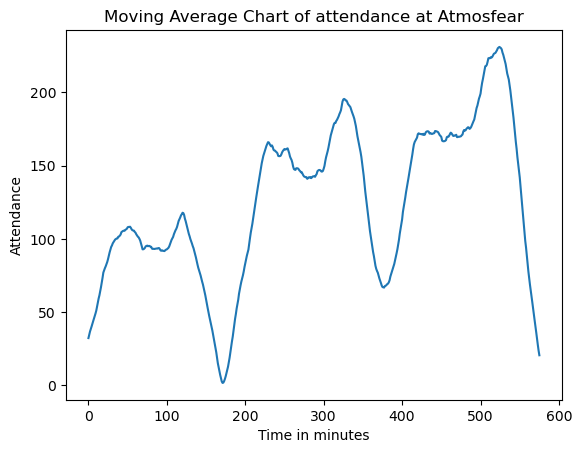

In [102]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
attraction_id = cursor.execute("SELECT AttractionID FROM attraction WHERE Name LIKE '%Atmosfear%'").fetchone()
sequences = cursor.execute("SELECT sequence FROM sequences").fetchall()
sequences = np.asarray([tup[0].split('-') for tup in sequences])
attendance = np.sum(sequences == str(attraction_id[0]), axis = 0)

window_size = 50
moving_average = np.convolve(attendance, np.ones(window_size)/window_size, 'same')
plt.plot(moving_average)
plt.title('Moving Average Chart of attendance at Atmosfear')
plt.xlabel('Time in minutes')
plt.ylabel('Attendance')
plt.show()

### **Question 3**:
Create and display an exponentially-weighted moving average chart of the attendance at 'Atmosfear' over the data provided. Again, use a window size of 50 for this weighted moving average.

**Note:** 
* The Weighted Moving Average Chart should have the below mentioned parameters,
    * title named '**Exponentially Weighted Moving Average Chart of the attendance at Atmosfear**'  
    * x-label ('**Time in minutes**') and y-label ('**Attendance**')
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels


In [11]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
